![agents](images/header.jpg)
# Análisis de textos imprecisos
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/nlp/blob/master/9.%20Desambiguación%20II.ipynb)

## Lógica difusa

Una forma particularmente frecuente de imprecisión en el lenguaje se presenta en aquellos enunciados en los que no está clara la extensión de aplicabilidad de un concepto. A esta situación le llamamos **vaguedad**. Formalmente, es posible establecer una distinción entre ambigüedad y vaguedad; utilizamos el término de ambigüedad, para aquellas situaciones en las que la interpretación de una palabra o una frase ofrece varias alternativas, mientras que la vaguedad se referiría a la falta de precisión del lenguaje. Sin embargo, el hecho de que podamos utilizar el término *viejo/a* para referirse a una película de hace 20 años y *nuevo* para referirse a libros escritos en los primeros años posteriores a la muerte de Jesús de Nazareth (el Nuevo Testamento) o *caliente* para referirse a una temperatura ambiente de 35<sup>o</sup>C y *tibio* para referirse a la temperatura de un café a menos de 70-60<sup>o</sup>C, hace evidente una estrecha relación entre *ambigüedad* y *vaguedad*.

### Paradoja sorites
La vaguedad en el lenguaje suele describirse mediante la llamada *paradoja del montón* (o paradoja sorites), que en su forma más común puede expresarse de la siguiente manera: Supongamos que tenemos un montón de arena... digamos con un millón de granos

![](images/sorites.jpg)

Si removemos un sólo grano de arena del montón ahora tenemos 999,999 granos, lo cual es aún un montón; si removemos otro grano de arena, seguimos teniendo un montón de arena, ahora con 999,998 granos. Si continuamos este proceso, retirando un grano de arena a la vez, eventualmente tendremos un sólo grano de arena que, evidentemente, no es un montón: Entonces, ¿en qué punto dejó de ser un montón?

Otras variantes de esta paradoja hacen referencia a la oposición entre pequeños cambios y grandes consecuencias, por ejemplo, los puntos cercanos en una escala de colores son indistinguibles para el ojo humano, pero si observamos puntos suficientemente separados la diferencia es evidente, por ejemplo, los puntos en un extremo de la escala son rojos, mientras que en el extremo opuesto son azules:

![](images/sorites2.png)

El hecho de que una secuencia de puntos (localmente) indistinguibles contenga puntos completamente diferenciados, plantea la paradoja. Este tipo de paradojas se presentan comúnmente en el lenguaje cotidiano y es consecuencia de representar una escala continua mediante un conjunto de conceptos discretos, por ejemplo, {*pequeño*, *alto*}

![](images/sorites3.jpg)

o {*joven*, *viejo*}

![](images/sorites4.jpg)

Cada uno de estos conceptos representa un conjunto al que pertenecen los elementos que cumplen con ciertas condiciones, por ejemplo, todos los individuos de "*corta*" estatura pertenecen al conjunto *pequeño*, mientras que los de *gran* estatura pertenecen al conjunto *alto*. Al utilizar elementos diferenciados por un valor de escala, es necesario tomar una decisión de cómo dividir el universo de observaciones en los conjuntos disponibles:

![](images/sorites3b.jpg)

Una manera común de (intentar) resolver estas paradojas es utilizar modificadores como "*poco*" y "*mucho*", a la manera de una [escala de Likert](https://en.wikipedia.org/wiki/Likert_scale), por ejemplo, el caso de estaturas puede replantearse mediante la escala de valores lingüísticos:

<code>{"Muy pequeño", "Pequeño", "Mediano", "Alto", "Muy alto"}</code>

Sin embargo, esta estrategia, aunque común, suele agregar más imprecisión al lenguaje, al no quedar claro cuando usar el modificador y cuando prescindir de él.


### Conjuntos difusos

Los conjuntos difusos pueden considerarse como una extensión de los conjuntos clásicos (nítidos o *crisp*). En los conjuntos clásicos, un elemento pertenece (por completo) al conjunto o no pertenece (en absoluto) al conjunto. Para un conjunto (clásico) $A$, se define su complemento como el conjunto formado por todos los elementos en el universo, $U$, que no pertenecen a $A$, $A^c = \{x\in U\ |\ x\not\in A\}$, es decir, un elemento pertenece al  conjunto nítido $A$ o pertenece a su complemento, pero no a ambos ($A\cap A^c = \phi$), lo cual equivale en lógica a la ley del tercero excluido: Si una frase es cierta, entonces su negación es falsa y viceversa. 

Los conjuntos difusos, por otra parte, se definen a través de funciones continuas de pertenencia en el rango $[0, 1]$, es decir, los elementos de un conjunto difuso pueden no pertenecer (en absoluto) al conjunto (pertenencia igual a acero), o pueden pertenecer por completo al conjunto (pertenencia igual a 1) o pueden tener valores parciales de pertenencia. En consecuencia, un elemento dado puede pertenecer lo mismo al conjunto difuso que a su complemento. Por ejemplo, para el caso de la edad, podemos describir el problema mediante los conjuntos difusos "*Joven*" y "*Viejo*", como se muestra a continuación:

![](images/fuzzy02.png)

Aquí, el concepto *Joven* es modelado por un conjunto difuso trapezoidal. 

![](images/fuzzy04.png)

De acuerdo con este conjunto, una persona de hasta 25 años es "*definitivamente*" joven, lo cual corresponde a un valor de pertenencia de 1.0. Por otra parte, la pertenencia de una persona al conjunto "*Joven*" empieza a declinar gradualmente desde los 25 años hasta llegar a los 75 años, a partir de cuándo "*definitivamente*" no es joven, es decir, su pertenencia en el conjunto difuso "*Joven*" es cero. El conjunto difuso "*Viejo*", por su parte, también es modelado con un conjunto difuso trapezoidal, en dirección contraria. De acuerdo con este modelo, una persona con edad inferior a 25 años, "*definitivamente*" no es viejo, lo que corresponde a una pertenencia de cero en el conjunto difuso "*Viejo*". A partir de los 25 años, empieza a pertenecer cada vez más al conjunto difuso "*Viejo*", hasta que, a partir de los 75 años es "*definitivamente*" viejo. Otro aspecto  resaltar, en este modelo, es que, una persona con edad entre 25 y 75 años pertenece, simultáneamente, tanto al conjunto difuso "*Joven*" como al conjunto difuso "*Viejo*". De esta manera, se "*elimina*" la paradoja sorites, aunque sigue habiendo dos momentos en que deben tomarse decisiones estrictas: A los 25 años (cumplidos) se inicia el "*envejecimiento*" y este proceso concluye a los 75 años. Una alternativa para evitar esta decisión arbitraria es utilizar conjuntos triangulares: 

![](images/fuzzy05.png)

En este caso, el modelo establece que el paso del conjunto difuso "*Joven*" al conjunto difuso "*Viejo*" es gradual y a lo largo de todo el rango de valores (aquí considerado, arbitrariamente, ente cero y cien años)

> “*Lo que llamáis morir es acabar de morir y lo que llamáis nacer es empezar a morir y lo que llamáis vivir es morir viviendo*”. Los sueños, Franciso de Quevedo

Una forma más natural para describir un concepto mediante conjuntos difusos, es mediante funciones logísticas:

![](images/fuzzy06.png)

En este caso, aunque el paso del conjunto difuso "*Joven*" al conjunto difuso "*Viejo*" es también gradual, no es lineal: la persona empieza a envejecer al nacer, pero el paso no es "*notorio*" hasta pasados los 20 años y conforme se cumplen más años el proceso se acelera, particularmente al rebasar los 50 años :-|. 

Aunque los conjuntos difusos ofrecen una representación más natural de los conceptos lógicos y de las etiquetas lingüísticas, su costo computacional es muy superior al de los conjuntos basados en líneas rectas, por lo que es muy usual preferir el uso de conjuntos triangulares y trapezoidales.

De la misma manera, representamos ahora el concepto de estatura, en esta ocasión utilizando tres conjuntos difusos trapezoidales:

![](images/fuzzy03.png)

Aunque no existe una nomenclatura universal para definir las características de los conjuntos difusos, se suelen utilizar los siguientes conceptos:

![](images/fuzzy07.png)

* El **universo de discurso** es el conjunto de todos los valores sobre los que se define el conjunto difuso.

* El **borde inferior** es el límite izquierdo de valores que pertenecen al conjunto.

* El **borde superior** es el límite derecho de valores que pertenecen al conjunto.

* El **soporte** es el conjunto de todos los puntos que pertenecen al conjunto difuso, desde el borde inferior hasta el borde superior, incluídos éstos.

* El **valor modal** es el punto donde la función de pertenencia tiene valor 1.0 (o el valor máximo, lo que correspondería, como analogía, al valor más frecuente en el caso estadístico). Es de especial utilidad para describir conjuntos definidos alrededor de un valor, como es el caso de los conjuntos triangulares. Si el conjunto es simétrico, el valor modal coincide con el centro del conjunto.

* El **núcleo** se utiliza para describir conjuntos que poseen una "*meceta*" (puntos consecutivas con pertenencia 1, como es el caso de los conjuntos trapezoidales; el núcleo es el ancho de esa meceta.

* El **punto de cruce** es cualquiera de los puntos donde la función de pertenencia toma el valor 0.5

* El **ancho de banda** es el conjunto de valores entre los dos puntos de cruce, en conjuntos difusos que tienen dos y sólo dos puntos de cruce.

A continuación, se presentan algunas de las formas más usuales de conjuntos difusos:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

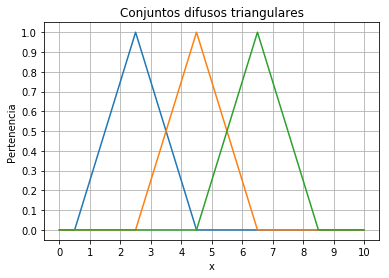

In [2]:
class TriangFS:
    def __init__(self, mod, sup):
        self.modal = mod
        self.a = mod - sup/2
        self.b = mod + sup/2
        self.m = 2 / sup
        
    def mu(self, x):
        if x < self.a:
            return 0
        elif x < self.modal:
            return self.m * (x - self.a)
        elif x < self.b:
            return self.m * (self.b - x)
        else:
            return 0

        
xvals = np.arange(0, 10.0, 0.01)
yvals = 3 * [0]

set_A = TriangFS(2.5, 4.0)
yvals[0] = [set_A.mu(x) for x in xvals]

set_B = TriangFS(4.5, 4.0)
yvals[1] = [set_B.mu(x) for x in xvals]

set_C = TriangFS(6.5, 4.0)
yvals[2] = [set_C.mu(x) for x in xvals]

plt.plot(xvals, yvals[0])
plt.plot(xvals, yvals[1]) 
plt.plot(xvals, yvals[2])
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))

plt.xlabel('x')
plt.ylabel('Pertenencia')
plt.title('Conjuntos difusos triangulares')
plt.grid(True)
plt.show()

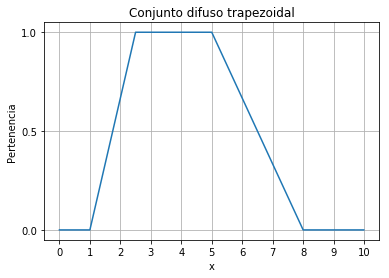

In [3]:
class TrapezFS:
    def __init__(self, inf, a, b, sup):
        self.a = a
        self.b = b
        self.inf = inf
        self.sup = sup
        self.ma = 1 / (a - inf)
        self.mb = 1 / (sup - b)

    def mu(self, x):
        if x < self.inf:
            return 0
        elif x < self.a:
            return self.ma * (x - self.inf)
        elif x < self.b:
            return 1.0
        elif x < self.sup:
            return self.mb * (self.sup - x)
        else:
            return 0

        
set_D = TrapezFS(1.0, 2.5, 5, 8)
xvals = np.arange(0, 10.0, 0.01)
yvals = [set_D.mu(x) for x in xvals]

plt.plot(xvals, yvals)
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.5))

plt.xlabel('x')
plt.ylabel('Pertenencia')
plt.title('Conjunto difuso trapezoidal')
plt.grid(True)
plt.show()

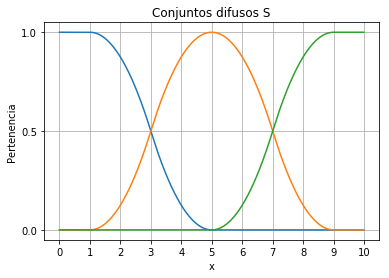

In [4]:
class SfunctionFS:
    def __init__(self, m, d, a):
        self.delta = d
        self.modal = m
        self.align = a

    def mu(self, x):
        if self.align == -1:
            if x < self.modal:
                return 1
            elif x < self.modal + self.delta/2:
                return 1 - 2 * ((self.modal - x) / (self.delta))**2
            elif x < self.modal + self.delta:
                return 2 * ((self.modal + self.delta - x) / (self.delta))**2
            else:
                return 0
        if self.align == 0:
            if x < self.modal - self.delta:
                return 0
            elif x < self.modal - self.delta/2:
                return 2 * ((self.modal - self.delta - x) / (self.delta))**2
            elif x < self.modal + self.delta/2:
                return 1 - 2 * ((self.modal - x) / (self.delta))**2
            elif x < self.modal + self.delta:
                return 2 * ((self.modal + self.delta - x) / (self.delta))**2
            else:
                return 0
        if self.align == 1:
            if x < self.modal - self.delta:
                return 0
            elif x < self.modal - self.delta/2:
                return 2 * ((self.modal - self.delta - x) / (self.delta))**2
            elif x < self.modal:
                return 1 - 2 * ((self.modal - x) / (self.delta))**2
            else:
                return 1

set_E = SfunctionFS(1, 4, -1)
xvals = np.arange(0, 10.0, 0.01)
yvals = [set_E.mu(x) for x in xvals]
plt.plot(xvals, yvals)
        
set_F = SfunctionFS(5, 4, 0)
xvals = np.arange(0, 10.0, 0.01)
yvals = [set_F.mu(x) for x in xvals]
plt.plot(xvals, yvals)
        
set_G = SfunctionFS(9, 4, 1)
xvals = np.arange(0, 10.0, 0.01)
yvals = [set_G.mu(x) for x in xvals]
plt.plot(xvals, yvals)

plt.xlabel('x')
plt.ylabel('Pertenencia')
plt.title('Conjuntos difusos S')
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.5))
plt.grid(True)
plt.show()

## Representación difusa de opiniones

Una de las áreas más activas en análsisi de textos, actualmente, es la identificación de polaridad en textos. Esta actividad suele hacerse siguiendo una de dos grandes aproximaciones: la aproximación simbólica y la aproximación basada en aprendizaje automático (*machine learning*). En el primer caso, se construye manualmente un lexicón con anotaciones de polaridad y a continuación, se realiza un análisis del texto para determinar la frecuencia de palabras positivas o negativas. La siguiente revisión, por ejemplo, está calificada como positiva:

> The Classic War of the Worlds by Timothy Hines is a <u>very entertaining</u> film that obviously goes to great effort and lengths to <u>faithfully</u> recreate H. G. Wells' classic book. Mr. Hines <u>succeeds</u> in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur critics look only to criticize everything they can. Others rate a movie on more important bases, like being entertained, which is why most people never agree with the critics. We <u>enjoyed</u> the effort Mr. Hines put into being faithful to H.G. Wells' classic novel, and we found it to be <u>very entertaining</u>. This made it easy to overlook what the critics perceive to be its shortcomings.

En este párrafo se han subrayado algunas de las palabras que reflejan juicio y tienen un sentido positivo. La siguiente revisión, por otro lado, tiene una polaridad negativa, con algunas frases de juicio subrayadas:

> This movie <u>could have been very good</u>, but comes up way short. <u>Cheesy special effects</u> and so-so acting. I could have looked past that if the <u>story</u> wasn't <u>so lousy</u>. If there was more of a background story, it would have been better. The plot centers around an evil Druid witch who is linked to this woman who gets migraines. <u>The movie drags</u> on and on and <u>never clearly explains anything</u>, it just keeps plodding on. Christopher Walken has a part, but it is completely senseless, as is most of the movie. This movie had potential, but it looks like some <u>really bad</u> made for TV movie. <u>I would avoid this movie</u>.

Los métodos basados en *machine learning*, por su parte, utilizan una gran cantidad de documentos, típicamente pre evaluados manualmente, para inferir modelos semánticos a partir de ellos.

In [10]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import display

In [11]:
movies_reviews = pd.read_csv("Data sets/Movies Reviews/labeledTrainData.tsv", sep='\t')
movies_reviews.review = list(map(lambda row: re.sub("[^a-zA-Z]", " ", 
                                BeautifulSoup(row, "lxml").get_text().lower()), 
                                 movies_reviews.review))
stops = set(stopwords.words("english"))                  
movies_reviews["words"] = list(map(lambda row: [w for w in row.split() if not w in stops], 
                                   movies_reviews.review))
Sentiments = np.array([int(x) for x in movies_reviews.sentiment])

all_words = nltk.FreqDist(w.lower() for wl in movies_reviews.words for w in wl)

vectorizer = TfidfVectorizer(stop_words='english')
X_data = vectorizer.fit_transform(movies_reviews.review)

train_setM, test_setM, train_targetsetM, test_targetsetM = train_test_split(
    X_data, Sentiments, test_size=0.2)

clfM = MultinomialNB()
clfM.fit(train_setM, train_targetsetM)

display(movies_reviews.head())
predictions_testM = clfM.predict(test_setM)
fails_testM = sum(test_targetsetM  != predictions_testM)
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)\n"
      .format(fails_testM, test_setM.shape[0], 100*fails_testM/test_setM.shape[0]))

,id,sentiment,review,words
0,5814_8,1,with all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,..."
1,2381_9,1,the classic war of the worlds by timothy hi...,"[classic, war, worlds, timothy, hines, enterta..."
2,7759_3,0,the film starts with a manager nicholas bell ...,"[film, starts, manager, nicholas, bell, giving..."
3,3630_4,0,it must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme..."
4,9495_8,1,superbly trashy and wondrously unpretentious ...,"[superbly, trashy, wondrously, unpretentious, ..."


Puntos mal clasificados en el conjunto de prueba: 651 de 5000 (13.02%)



En ambas aproximaciones, la evaluación de polaridad de palabras, frases o textos completos, suele realizarse bajo un enfoque binario. En las siguientes revisiones, por ejemplo, de la película *Shutter Island*, uno de las revisiónes califica la película como buena (tomate fresco) mientras que la otra la considera como una mala película (tomate podrido);

![](images/fuzzy_opinion.jpg)

Observando las palabras utilizadas en cada revisión, es evidente que el simple conteo de palabras positivas y negativas es insuficiente para llegar a la conclusión del crítico. 

Una manera de mejorar el análisis de polaridad es utilizar conceptos difusos. Utilizamos, por ejemplo, los conceptos difusos "*Negativo*", "*Neutral*" y "*Positivo*", como se muestra a continuación:

![](images/fuzzy_opinion2.png)

Podemos asociar estos conceptos difusos a un universo de discurso basado en valores lingüísticos ordenados, tipo escala de Likert:

![](images/fuzzy_opinion3.png)

Las etiquetas lingüísticas suelen asociarse a un número que funciona como índice en la secuencia ordenada de etiquetas lingüísticas:

![](images/fuzzy_opinion4.png)

Un sistema de inferencia difusa (FIS - *Fuzzy Inference System*) es un sistema que opera sobre valores de entrada difusas. Los sistemas de inferencia difusa tienen la siguiente estructura general:

![](images/fuzzy_steps.png)

* La Fuzzificación consiste en transformar el sistema de entradas, consistentes en números nítidos (*crisp*), en una representación basada en conjuntos difusos. 

* La máquina de inferencia es el conjunto de procedimientos que permiten razonar acerca de los datos difusos. En los FIS tradicionales, el mecanismo de razonamiento suele ser un sistema basado en reglas.

* La Base de conocimiento es el repositorio que contiene las reglas u otros elementos de razonamiento (un conjunto de reglas lógicas, una base de casos, o un conjunto de vectores de entrenamiento, por ejemplo).

* La defuzzificación consiste en transformar la salida difusa del proceso de razonamiento en números nítidos

### Fuzzificación 

Consideremos el siguiente conjunto de palabras, clasificadas de acuerdo a la escala de Likert {"*Muy negativo*", "*Negativo*", "*Positivo*", "*Muy positivo*"}:

|Muy negativo | Negativo | Positivo | Muy positivo | 
|--- | --- | --- | --- |  
| Mentiroso | Vanidoso | Amable | Acertado | 
| Falso | Pedante | Agradable | Bueno |
| Hipócrita | Antipático | Tolerante | Bondadoso |
| Resentido | Egocéntrico | Alegre | Competente |
| Malo | Engreído | Cordial | Emprendedor |
| Dañino | Agrandado | Encantador | Perseverante |
| Agresivo | Egoísta | Educado | Metódico |
| Corrupto | Tacaño | Independiente | Experto |
| Aprovechador | Desconsiderado | Organizado | Excepcional |
| Vengativo | Caprichoso | Lógico | Extraordinario |
| Violento | Maleducado | Discreto | Constante |
| Pendenciero | Intolerante | Paciente | Honrado |
| Despiadado | Terco | Precavido | Justo |
| Despreciable | Envidioso | Prudente | Responsable |  
| Tirano | Farsante | Respetuoso | Sabio |

Este vocabulario puede codificarse, utilizando los conjuntos difusos previos, de la siguiente manera:

| Etiqueta | Pertenencia en los conjuntos "Negativo", "Neutral" y "Positivo" |
| ---  | --- |
| $x$ = '*Mentiroso*' | $\mu_{Negativo}(x) = 1.0, \ \mu_{Neutral}(x) = 0.0, \ \mu_{Positivo}(x) = 0.0$ |
| $x$ = '*Vanidoso*' | $\mu_{Negativo}(x) = 0.5, \ \mu_{Neutral}(x) = 0.5, \ \mu_{Positivo}(x) = 0.0$ |
| $x$ = '*Amable*' | $\mu_{Negativo}(x) = 0.0, \ \mu_{Neutral}(x) = 0.5, \ \mu_{Positivo}(x) = 0.5$ |
| $x$ = '*Acertado*' | $\mu_{Negativo}(x) = 0.0, \ \mu_{Neutral}(x) = 0.0, \ \mu_{Positivo}(x) = 1.0$ |
| $x$ = '*Falso*' | $\mu_{Negativo}(x) = 1.0, \ \mu_{Neutral}(x) = 0.0, \ \mu_{Positivo}(x) = 0.0$ |
| $x$ = '*Pedante*' | $\mu_{Negativo}(x) = 0.5, \ \mu_{Neutral}(x) = 0.5, \ \mu_{Positivo}(x) = 0.0$ |
| $x$ = '*Agradable*' | $\mu_{Negativo}(x) = 0.0, \ \mu_{Neutral}(x) = 0.5, \ \mu_{Positivo}(x) = 0.5$ |
| $x$ = '*Bueno*' | $\mu_{Negativo}(x) = 0.0, \ \mu_{Neutral}(x) = 0.0, \ \mu_{Positivo}(x) = 1.0$ |

Una forma alternativa de representación difusa es mediante la siguiente tripleta:

$$x \to {\cal X} = \left(\alpha, \mu_\alpha(x), s \right)$$

Aquí $x$ es el valor nítido que queremos codificar (o, equivalentemente, la etiqueta lingüística representada por el índice); $\cal{X}$ es su representación difusa; $\alpha$ es el conjunto difuso en el que $x$ tiene mayor valor de pertenencia difusa; $\mu_\alpha(x)$ es la pertenencia de $x$ en el conjunto $\alpha$ y $s\in \{Izquierda, Centro, Derecha\}$ es el lado sobre la curva donde se encuentra $x$. En la figura siguiente se muestra un ejemplo de codificación utilizando este esquema:

![](images\fuzzy_opinion5.png)

Así, las palabras anteriores pueden representarse de la siguiente manera:

| Etiqueta | Codificación difusa compacta |
| ---  | --- |
| $x$ = '*Mentiroso*' | $\left(Negativo, 1.0, Izquierda\right)$ |
| $x$ = '*Vanidoso*'  | $\left(Negativo, 0.5, Derecha\right)$   |
| $x$ = '*Amable*'    | $\left(Positivo, 0.5, Izquierda\right)$    |
| $x$ = '*Acertado*'  | $\left(Positivo, 1.0, Derecha\right)$   |
| $x$ = '*Falso*'     | $\left(Negativo, 1.0, Izquierda\right)$ |
| $x$ = '*Pedante*'   | $\left(Negativo, 0.5, Derecha\right)$   |
| $x$ = '*Agradable*' | $\left(Positivo, 0.5, Izquierda\right)$    |
| $x$ = '*Bueno*'     | $\left(Positivo, 1.0, Derecha\right)$   |

Obsérvese que el término '*Vanidoso*' hubiera podido ser codificado en el conjunto difuso $Neutral$ en lugar de clasificarlo en el conjunto $Negativo$ y sería igualmente válido. Dado que sólo escogemos un conjunto, preferimos utilizar el conjunto $Negativo$ que representa un juicio directo de polaridad. Lo mismo pasaría con el término '*Amable*', que preferimos clasificarlo en el conjunto $Positivo$. 

### Inferencia

El mecanismo de inferencia depende del problema y de la estrategia de solución. Una estrategia que podemos utilizar, en el caso de minería de opiniones, es conducir un proceso de agregación de las palabras significativas, como si se tratara de un proceso de votación. Consideremos, por ejemplo, la descripción del personaje "*Falcó*", protagonista de la obra del mismo nombre de Arturo Pérez-Reverte:

> "Falcó es un chulo elegante, un tipo amoral, un aventuro sin escrúpulos. Es capaz de torturar y matar, pero también es divertido, simpático, inteligente, elegante. Esa mezcla de luz y sombra, del lado positivo y negativo, caracteriza el personaje", Arturo Pérez-Reverte, Feria Internacional del Libro (FIL) de Guadalajara, 2016.

Si identificamos la polaridad de los adjetivos utilizados en la descripción, obtenemos:

|Muy negativo | Negativo | Positivo | Muy positivo | 
|--- | --- | --- | --- |  
| Chulo | Amoral | Aventurero | Elegante | 
| Sin_Escrúpulos |   | Divertido | Inteligente | 
| Torturar |   | Simpático |  | 
| Matar |  |  |  |

Que pueden representarse como:

![](images/fuzzy_opinion6.png)

Como puede observarse, de 10 términos significativos para determinar la polaridad del texto, 5 son *positivos* y 5 son *negativos*. Sin embargo, se puede apreciar una pequeña tendencia hacia el conjunto $Negativo$, como se describe en la imagen previa.

Una forma simple de generar una decisión a partir de estos términos es evaluando la importancia de cada conjunto difuso en el texto completo. Para ello, calculamos los siguientes índices:

* Inclinación hacia $Negativo$: $$I_{Negativo} = \frac{1}{n}\sum_{1=0}^n \mu_{Negativo}(x_i) = 0.45$$ 

* Inclinación hacia $Positivo$: $$I_{Positivo} = \frac{1}{n}\sum_{1=0}^n \mu_{Positivo}(x_i) = 0.35$$

donde $n=10$ es el número de términos significativos en el texto.

El conjunto *ganador* es $Negativo$, con un índice de $0.45$, contra $0.35$ para el conjunto $Positivo$, lo cual representa una pequeña ventaja hacia el conjunto $Negativo$, validando la evaluación informal obtenida al observar la distribución de palabras. Dado que los índices calculados son el promedio de valores de pertenencia en cada uno de los dos conjuntos difusos considerados, es natural tomar este valor como el valor de pertenencia de la solución, de manera que la opinión global puede calificarse como:

$${\cal O} = (Negativo, 0.45, Derecha)$$

Sin embargo, puesto que el valor de pertenencia es menor que $0.5$ sería preferible, de acuerdo con el esquema de fuzzificación panteado, expresar la salida como 

$${\cal O} = (Neutral, 0.55, Izquierda)$$

![](images/fuzzy_opinion7.png)

Así, puede decirse que el juicio en el texto es "*moderadamente*" negativo. 

### Defuzzificación

La etapa final en un método de análisis/control difuso suele ser la defuzzificación. En esta etapa, el resultado del proceso de inferencia es reconvertido al dominio de los datos de entrada. En el caso del análisis de polaridad, como lo hemos planteado, la defuzzificación consiste en generar la etiqueta lingüística que mejor describe el texto, que de acuerdo a los resultados del proceso de inferencia anterior sería `Neg`.